# Cross Validation Lab

In this lab I am going to use the mtcars dataset as an example that is done out for you. You are to read this, try running the cells and understand what is going on in them. Get the logic behind the things I've tried

1) Looking at train_test_split and comparing training scores to test scores.
2) Getting cross validation scores to make a selection on which features to use.
3) Trying Polynomial Regression on a variable to see if it can improve things.

After this, I want you to repeat the procedure with the Diabetes dataset
_________

First of all, let's look at last week's mtcars dataset and see what we can do with that
I said to try more than one feature and see if that improved the model, but the scores we used were not actually that reliable. We should be using separate sets for training and evaluating so let's try that now and see what happens

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})#denote the empty string in the csv to create an empty cell in the top left
dfcars.head()#print

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


y is the response variable so let's slice that off

In [56]:
y = dfcars['mpg']#mpg is the output we get from the model

We have multiple possible X's let's put them aside too, we don't want the first two columns

In [57]:
allX = dfcars.iloc[:, 2:]#remove the rest of the name and mpg rows

In [58]:
allX.head()#csv trimmed for processing

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We first of all need to separate the data into a training set and a test set. We can use train_test_split for this

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

I did random_state=42 so the answer is the same everytime I run this workbook.

Ok now we have two different datasets, train and test that we can use where appropriate. First of all, we just want to try different features

I think wt would be a good feature to select so I'll go with that

Separating out just that column into what we are going to fit

In [61]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

Now build the model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

Let's look at the scores of both the training set and test set

In [64]:
model1.score(X_train, y_train)

0.7701379909791616

In [65]:
model1.score(X_test, y_test)

0.6879761857596277

There is a decent difference between the scores so maybe overfit a little. Anyway let's try a different feature

In [66]:
X_train = allX_train[["hp"]]
X_test = allX_test[["hp"]]

In [67]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [68]:
model2.score(X_train, y_train)

#score() documentation
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
#best score for r is, r=1.0


0.6504157759912871

In [69]:
model2.score(X_test, y_test)

0.3996010170101508

Ok hp is even worse performing than wt. Not a good one to use

drat?

In [70]:
X_train = allX_train[["drat"]]
X_test = allX_test[["drat"]]

In [71]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [72]:
model3.score(X_train, y_train)

0.45889832481878434

In [73]:
model3.score(X_test, y_test)

0.4652147268834994

The best I tried was wt, the first one. Anyway let's try two variables

In [74]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [75]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [76]:
model4.score(X_train, y_train)

0.8321502526033073

That is a better training score, but what about the test score which is really what's important

In [77]:
model4.score(X_test, y_test)

0.7880448439485953

That's the best we've had so far, so model4 is the best one of that

## Validation
Hold on, I've contradicted a little what I said in the "lecture". I'm using the test score to make decisions. I should not be doing this. I should use some form of validation. So here's an example of that

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .. versionchanged:: 1.

Let's try wt again

In [80]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [ ]:
model5 = LinearRegression()
scores = cross_val_score(model5, X_train, y_train)
scores

#Documentation for cross_val_score()
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [82]:
scores.mean()

np.float64(0.5711128154689776)

Now let's try the two variables, wt and hp again

In [83]:
#slowly add features to find a better fit for the model y = w0 + w1
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [84]:
model6 = LinearRegression()
scores6 = cross_val_score(model5, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [85]:
scores6.mean()

np.float64(0.6332786406507414)

So the two together has a higher cross validation score that just one. This means we should select the two variables over one 

What about 3? Let's try drat

In [86]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [87]:
model7 = LinearRegression()
scores7 = cross_val_score(model5, X_train, y_train)
scores7.mean()

np.float64(0.6571279909053492)

Slightly better than 2. It is not always the case that more features the better, just happened in the above example

Let's try three features again, but this time with carb instead of drat

In [88]:
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [89]:
model8 = LinearRegression()
scores8 = cross_val_score(model5, X_train, y_train)
scores8.mean()

np.float64(0.6036599344425266)

This score is worse than only using the two features wt and hp

Our best so far (according to the cross val scores) has been model7, the one with ["wt","hp","drat"]. So let's build that model fully and then evaluate that

In [90]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.79004928438052

A score of .79 for the test set

## Polynomial Regression Example

I am going to use the 'wt' as a feature and see what happens with a polynomial regression model

Some notes about Polynomial and sklearn

### The `scikit-learn` interface

Scikit-learn is the main python machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in python by the incantation `import sklearn`.

The library has a very well defined interface. This makes the library a joy to use, and surely contributes to its popularity. As the [scikit-learn API paper](http://arxiv.org/pdf/1309.0238v1.pdf) [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).] says:

>All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: **an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data**. The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a `fit` method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

We'll use the "estimator" interface here, specifically the estimator `PolynomialFeatures`. The API paper again:

>Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a transformer interface which deﬁnes a transform method. It takes as input some new data X and yields as output a transformed version of X. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

To start with we have one **feature** `x` to predict `y`, what we will do is the transformation:

$$ x \rightarrow 1, x, x^2, x^3, ..., x^d $$

for some power $d$. Our job then is to **fit** for the coefficients of these features in the polynomial

$$ a_0 + a_1 x + a_2 x^2 + ... + a_d x^d. $$

In other words, we have transformed a function of one feature, into a (rather simple) **linear** function of many features. To do this we first construct the estimator as `PolynomialFeatures(d)`, and then transform these features into a d-dimensional space using the method `fit_transform`.

![fit_transform](images/sklearntrans.jpg)

Here is an example. The reason for using `[[1],[2],[3]]` as opposed to `[1,2,3]` is that scikit-learn expects data to be stored in a two-dimensional array or matrix with size `[n_samples, n_features]`.

To transform `[1,2,3]` into [[1],[2],[3]] we need to do a reshape.

![reshape](images/reshape.jpg)

In [91]:
demo = np.array([1,2,3]).reshape(-1,1)
demo

array([[1],
       [2],
       [3]])

----------
# example added by Lecturer to help me understand what the outputs of the origonal example meant


In [109]:
set = np.array([6,1,5,8,4,6,7,3]).reshape(-1,1)
set

array([[6],
       [1],
       [5],
       [8],
       [4],
       [6],
       [7],
       [3]])

In [112]:
PolynomialFeatures(3).fit_transform(set)

array([[  1.,   6.,  36., 216.],
       [  1.,   1.,   1.,   1.],
       [  1.,   5.,  25., 125.],
       [  1.,   8.,  64., 512.],
       [  1.,   4.,  16.,  64.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       [  1.,   3.,   9.,  27.]])

--------------

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
PolynomialFeatures(5).fit_transform(demo)

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

This is $x^0 , x^1, x^2, x^3, x^4, x^5$

We don't actually want that first column of ones if we are going to use sklearn.LinearRegression as it will give us two intercepts so actually do

In [94]:
PolynomialFeatures(5, include_bias=False).fit_transform(demo)

array([[  1.,   1.,   1.,   1.,   1.],
       [  2.,   4.,   8.,  16.,  32.],
       [  3.,   9.,  27.,  81., 243.]])

Which is now $x^1, x^2, x^3, x^4, x^5$

### I am going to just use a validation set for this and not have a test set at all

In [95]:
X_train = allX_train[["wt"]]
X_valid = allX_test[["wt"]]
y_valid = y_test

Let's try it with PolynomialFeatures(2)

In [96]:
X_train_poly = PolynomialFeatures(2, include_bias=False).fit_transform(X_train)
X_valid_poly = PolynomialFeatures(2, include_bias=False).fit_transform(X_valid)

In [97]:
modelpoly2 = LinearRegression()
modelpoly2.fit(X_train_poly, y_train)

LinearRegression()

In [98]:
print(modelpoly2.score(X_train_poly, y_train))
print(modelpoly2.score(X_valid_poly, y_valid))

0.854847503022551
0.6821839404663564


Let's now do a loop for more of them and record all the scores in an array

We will initialise the array as all zeros

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
max_p = 10
degrees = range(max_p+1)
train_scores = np.zeros(max_p+1)
valid_scores = np.zeros(max_p+1)
error_train = np.zeros(max_p+1)
error_valid = np.zeros(max_p+1)

In [101]:
for i in degrees:
    if i != 0:
        X_train_poly = PolynomialFeatures(i, include_bias=False).fit_transform(X_train)
        X_valid_poly = PolynomialFeatures(i, include_bias=False).fit_transform(X_valid)
        polymodel = LinearRegression()
        polymodel.fit(X_train_poly, y_train)
        prediction_on_training = polymodel.predict(X_train_poly)
        prediction_on_valid = polymodel.predict(X_valid_poly)
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        error_valid[i] = mean_squared_error(y_valid, prediction_on_valid)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        valid_scores[i] = polymodel.score(X_valid_poly, y_valid)

In [102]:
train_scores

array([0.        , 0.77013799, 0.8548475 , 0.85493705, 0.85535746,
       0.86830004, 0.87003984, 0.9023398 , 0.91029886, 0.91151736,
       0.91162721])

Now let's look at plots and things. I am going to keep doing error_train[1:], error_test[1:] so the 0 value is not counted

This will give us the degree with the lowest error in the test set

In [103]:
bestd = np.argmin(error_valid[1:])+1

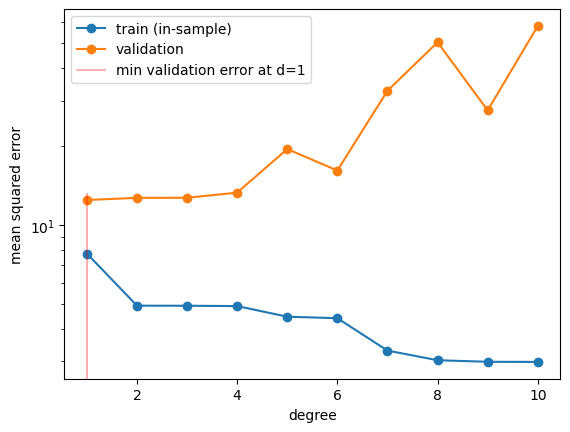

In [104]:
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_valid[1:], marker='o', label='validation')
plt.axvline(bestd, 0,0.5, color='r', label="min validation error at d=%d"%bestd, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

So the simple linear regression $y = w_0 + w_1x$ works best for wt

Notice how the training error keeps getting smaller as the degree increases, but this does not correspond to a better test error

This is expected if we looked at the scatter plot of wt vs mpg

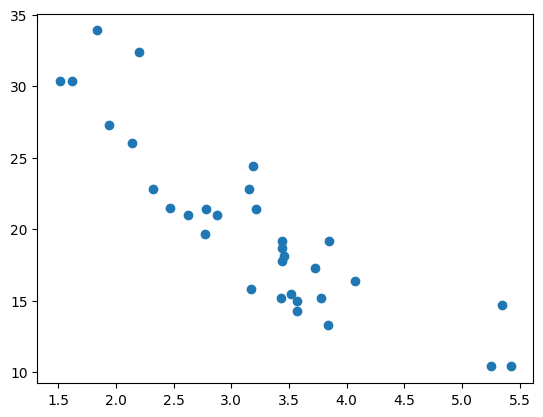

In [105]:
plt.scatter(dfcars["wt"],dfcars["mpg"])

Relationship looks linear

## Some work for you to do

In [106]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Do similar to what I've done with the diabetes dataset

See if you can find a better combination of columns rather than using all of them

Pick one variable and see if a Polynomial Regression model could improve that one variable